In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score , GridSearchCV
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing train_test_split
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_excel("StateCodeReduced.xlsx")

In [4]:
data.head()

,mw,code,temp,moisture,mvar,unit_no,mw_declare,Unnamed: 7,Unnamed: 8
0,95,SO,32,10.0,17,1,132,NaN,NaN
1,106,SO,43,6.0,25,1,132,NaN,NaN
2,118,LF1,26,10.0,43,3,132,NaN,NaN
3,122,LF1,39,7.0,43,3,148,NaN,NaN
4,120,SO,41,12.0,46,3,148,NaN,NaN


In [5]:
data['code'].value_counts()

SO     1285
LF1     633
LA       20
LP       15
PO       11
FA       11
FP        6
LD        1
Name: code, dtype: int64

In [6]:
data.isnull().sum()

mw               0
code             0
temp             0
moisture         0
mvar             0
unit_no          0
mw_declare       0
Unnamed: 7    1982
Unnamed: 8    1982
dtype: int64

In [7]:
data.corr()

,mw,temp,moisture,mvar,unit_no,mw_declare,Unnamed: 7,Unnamed: 8
mw,1.000000,0.181605,-0.108631,0.442904,0.479979,-0.199083,NaN,NaN
temp,0.181605,1.000000,-0.797736,0.279669,0.003285,0.076215,NaN,NaN
moisture,-0.108631,-0.797736,1.000000,-0.156405,-0.008763,-0.010247,NaN,NaN
mvar,0.442904,0.279669,-0.156405,1.000000,0.317014,0.033762,NaN,NaN
unit_no,0.479979,0.003285,-0.008763,0.317014,1.000000,-0.336532,NaN,NaN
mw_declare,-0.199083,0.076215,-0.010247,0.033762,-0.336532,1.000000,NaN,NaN
Unnamed: 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
X = data[["mw","temp","moisture","mvar","mw_declare","unit_no"]]
y = data["code"]
y

0        SO
1        SO
2       LF1
3       LF1
4        SO
       ... 
1977    LF1
1978    LF1
1979     SO
1980     SO
1981     SO
Name: code, Length: 1982, dtype: object

In [9]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X

,mw,temp,moisture,mvar,mw_declare,unit_no
0,-0.988142,-0.097790,-0.858841,-0.648323,-0.002739,-1.537021
1,-0.476141,1.546014,-1.237092,0.045087,-0.002739,-1.537021
2,0.082406,-0.994410,-0.858841,1.605262,-0.002739,-0.766567
3,0.268588,0.948267,-1.142529,1.605262,1.096813,-0.766567
4,0.175497,1.247140,-0.669716,1.865291,1.096813,-0.766567
...,...,...,...,...,...,...
1977,0.501316,-0.097790,0.370474,0.651822,-0.002739,1.159569
1978,0.873680,0.798830,-0.669716,1.431909,-0.002739,1.544796
1979,0.780589,0.948267,-0.953404,1.605262,-0.002739,1.544796
1980,0.547861,1.396577,-0.953404,1.605262,-0.002739,1.544796


In [10]:
sns.countplot(y)

NameError: name 'sns' is not defined

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [12]:
#Setup a knn classifier with k neighbors
Model = RandomForestClassifier(random_state=42)

In [13]:
#Fit the model
Model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [14]:
Model.score(X_test,y_test) # Accuracy of the model

0.8705882352941177

In [15]:
Model.score(X_train,y_train) # Accuracy of the model

1.0

In [16]:
y_pred = Model.predict(X_test)

In [17]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(mat, annot=True)

NameError: name 'sns' is not defined

<Figure size 720x720 with 0 Axes>

In [18]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          FA       1.00      0.71      0.83         7
          FP       1.00      0.75      0.86         4
          LA       1.00      0.62      0.77         8
          LD       0.00      0.00      0.00         1
         LF1       0.83      0.81      0.82       196
          LP       0.60      1.00      0.75         3
          PO       0.67      1.00      0.80         2
          SO       0.89      0.91      0.90       374

    accuracy                           0.87       595
   macro avg       0.75      0.73      0.72       595
weighted avg       0.87      0.87      0.87       595



In [19]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [20]:
rf = RandomForestClassifier(random_state=42)
gs = GridSearchCV(estimator=rf,param_grid=param_grid,scoring="accuracy", cv=10)
grid_search = gs.fit(X_train,y_train)
best_score = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Score:",best_score)
print("Best Parameters:",best_parameters)

Best Score: 0.857225523928683
Best Parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [21]:
Model = RandomForestClassifier(**best_parameters)
#Fit the model
Model.fit(X_train,y_train)
y_pred = Model.predict(X_test)

In [22]:
rf_acc = metrics.accuracy_score(y_test, y_pred)
print(rf_acc)

0.865546218487395


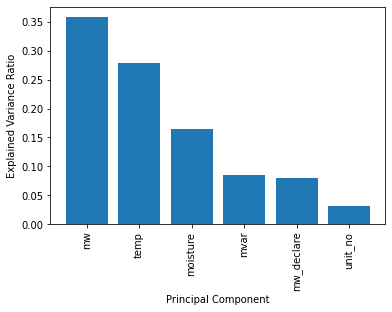

Number of components that contain more than 95% of variance: 5


In [23]:
pca = PCA()
pca.fit(X)
# Get the explained variance ratio for each component
exp_var_ratio = pca.explained_variance_ratio_

# Plot a bar chart of the explained variance ratio
feature_names = list(X_train.columns)
# Plot a bar chart of the explained variance ratio with feature names
plt.bar(range(1, len(exp_var_ratio)+1), exp_var_ratio)
plt.xticks(range(1, len(feature_names)+1), feature_names, rotation=90)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print("Number of components that contain more than 95% of variance:", n_components)

In [24]:
# Perform PCA to reduce the dimensions of the dataset
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)
# Split the dataset into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [ ]:
rf = RandomForestClassifier(random_state=42)
gs = GridSearchCV(estimator=rf,param_grid=param_grid,scoring="accuracy", cv=10)
grid_search = gs.fit(X_train2,y_train2)
best_score = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Score:",best_score)
print("Best Parameters:",best_parameters)

In [148]:
Model = RandomForestClassifier(**best_parameters)
#Fit the model
Model.fit(X_train2,y_train2)
y_pred2 = Model.predict(X_test2)

In [149]:
svc_acc = metrics.accuracy_score(y_test2, y_pred2)
print(svc_acc)

0.8161209068010076


In [154]:
# assume row is the new data point to predict with 5 features
query_point = [[95,32,10,17,1,132]]
query_point_scaled = scaler.transform(query_point)
query_point_pca = pca.transform(query_point_scaled)
prediction = Model.predict(query_point_pca)
print("Prediction:", prediction)

Prediction: ['LA']
